###Mineria De Datos – Ingeniería de Sistemas (CORHUILA)
###Docente: Julian Quimbayo
###Semestre: 2025-2
###Fecha de sustentación: 18 de noviembre de 2025
###Estudiante : JulianGuerra -Edwin Menendez

###Paso 1: Importar Librerías
Importar pandas, numpy, matplotlib, seaborn, sklearn y otras librerías necesarias.


In [ ]:
# 0) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
%matplotlib inline


###Paso 2: Importar Datos
###Cargar el dataset asignado y crear una copia de trabajo para preservar los datos originales

In [ ]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
### Copia de nuestro data set
data = data.copy()

###Paso 3: Revisar Datos NAN
###Identificar valores faltantes usando .info(), .describe(), .isna().sum() y visualizaciones con
###heatmap.


In [ ]:
# Información general
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Estadísticas descriptivas
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Se observa si existen registros con NaN
print("Columna           NaN")
print(data.isnull().sum(axis=0))

Columna           NaN
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


<Axes: >

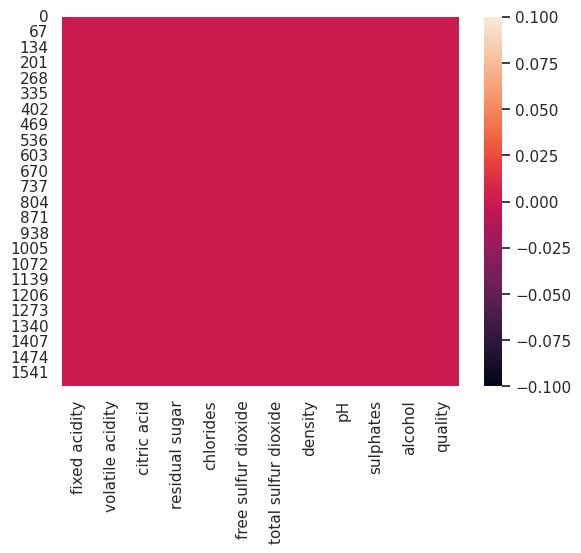

In [ ]:
###Realizamos una grafica para ver si hay valores NaN
sns.heatmap(data.isna())

###no la entiendo solo lo asocio a que no existen valores NaN

###Paso 4: Limpiar Datos
###Tratar valores faltantes, corregir inconsistencias, estandarizar categorías y eliminar
###duplicados.

In [ ]:
# Buscamos valores duplicados
dups = data.duplicated().sum()
print("Duplicados:", dups)

Duplicados: 240


In [ ]:
# Si hay duplicados y quieres borrarlos:
# data = data.drop_duplicates()

In [ ]:
#### Como podemmos Observas No es necesario codificar variables en este dataset ---
# El dataset de vinos solo contiene variables numéricas,
# por lo tanto no hay columnas que necesiten conversión a valores numéricos.

###Paso 5: Realizar Gráficas para Analizar Tendencias
###Crear visualizaciones (countplot, histplot, boxplot, scatter, pie, etc.) para cada variable
###relevante y analizar cada gráfica.


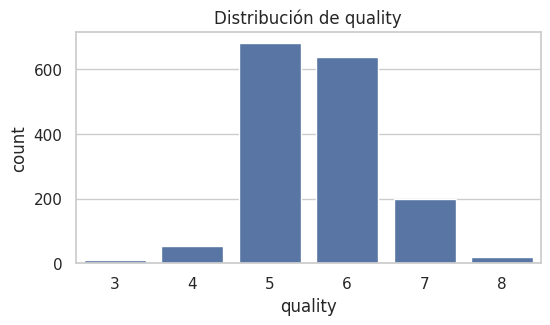

In [ ]:
# Distribución quality
plt.figure(figsize=(6,3))
sns.countplot(x='quality', data=data)
plt.title('Distribución de quality')
plt.show()


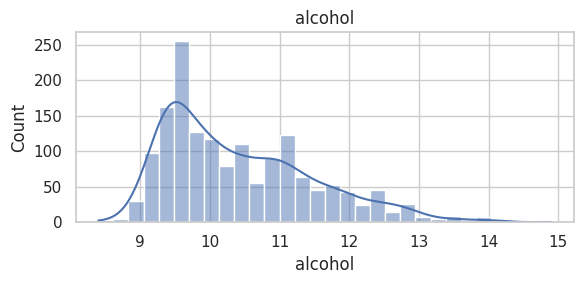

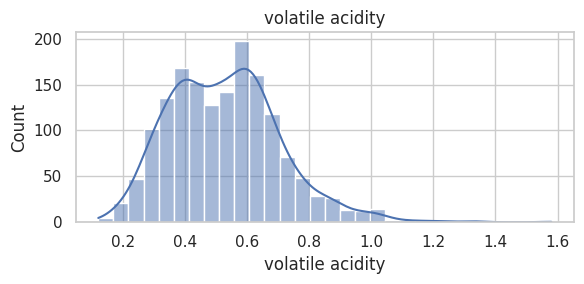

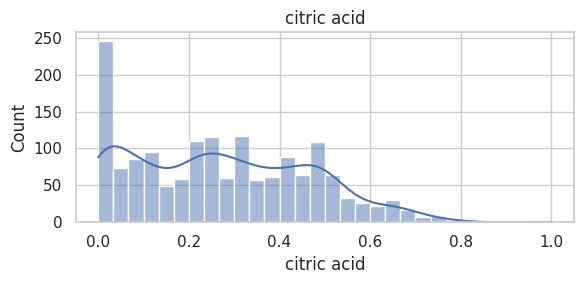

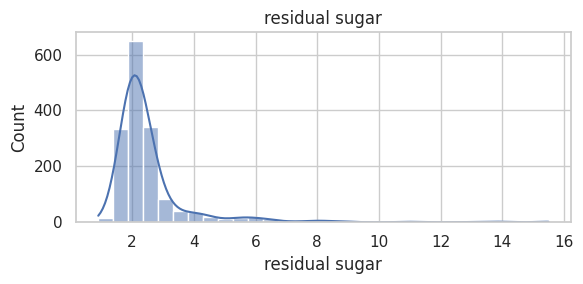

In [ ]:
# Histogramas seleccionados
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
for col in ['alcohol','volatile acidity','citric acid','residual sugar']:
    plt.figure(figsize=(6,3))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(col)
    plt.tight_layout()
    plt.show()

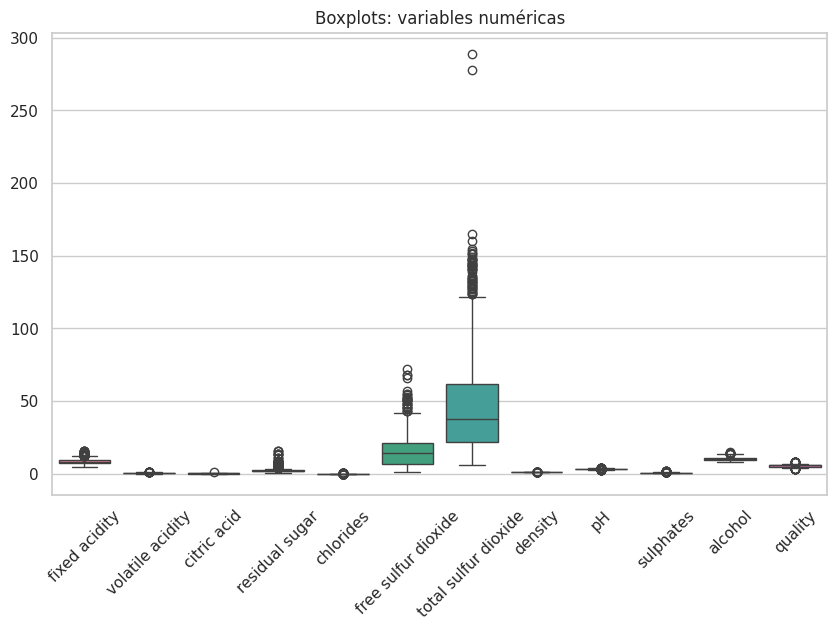

In [ ]:
# Boxplots para outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=data[num_cols])
plt.xticks(rotation=45)
plt.title('Boxplots: variables numéricas')
plt.show()

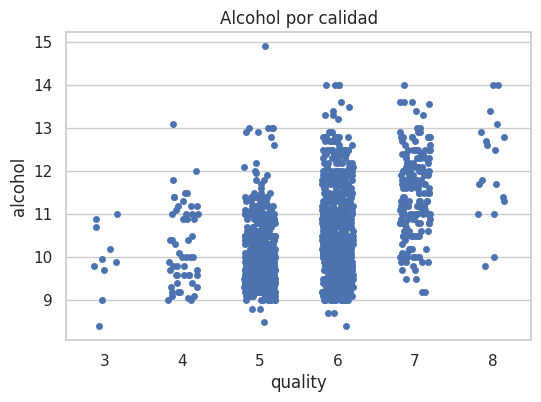

In [ ]:
# Scatter alcohol vs quality (jitter)
plt.figure(figsize=(6,4))
sns.stripplot(x='quality', y='alcohol', data=data, jitter=0.2)
plt.title('Alcohol por calidad')
plt.show()

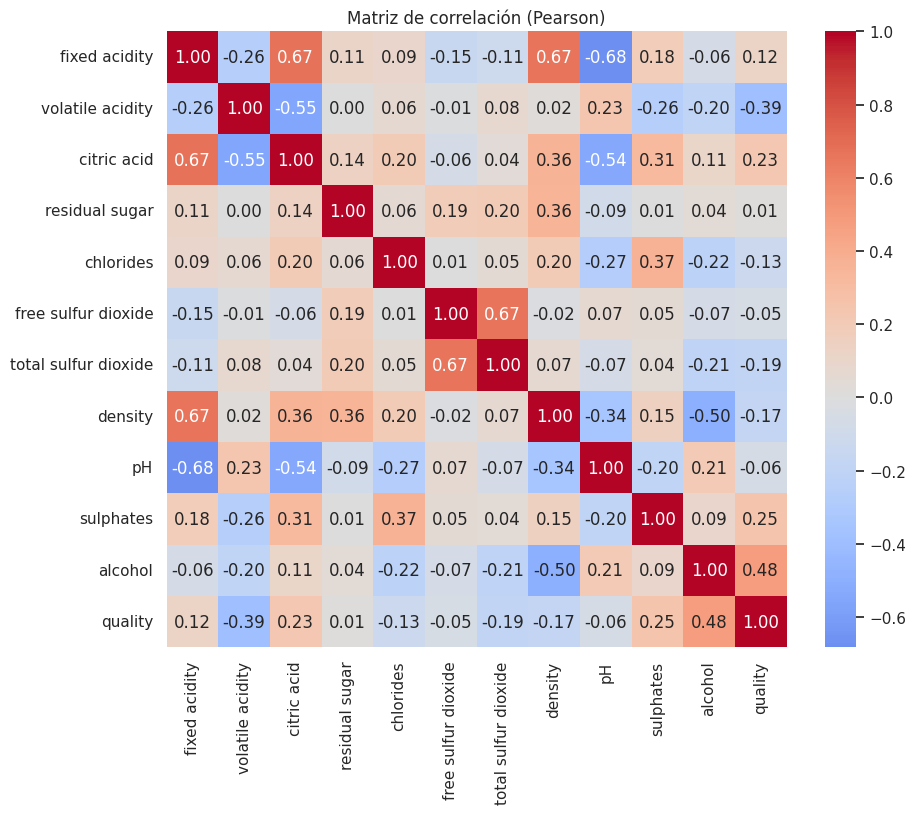

In [ ]:
# Heatmap correlación (pearson)
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de correlación (Pearson)')
plt.show()

###Paso 6: Conversión de Variables a Número
###Aplicar LabelEncoder o técnicas similares para convertir variables categóricas a numéricas

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Paso 6: Conversión de Variables a Número
# En este paso verificamos si existen variables categóricas
# que necesiten convertirse a numéricas mediante LabelEncoder.
#Como el profe lo explica en su video Video Manejo del EDA en Python - Parte 1
# En este dataset (winequality-red.csv) todas las columnas son numéricas.
# Por lo tanto, no es necesario aplicar LabelEncoder.
# Aun así, se deja la estructura del código original para cumplir con el formato del paso.
# y mi profesor no se enoje conmigo
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Ejemplo de estructura (sin ejecución real, porque no hay variables categóricas)
# data['columna'] = le.fit_transform(data['columna'])
# Confirmación
print("No existen columnas categóricas que requieran conversión.")


In [ ]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


En este paso se verificó el tipo de datos del conjunto winequality-red.csv.
Todas las variables fixed acidity, volatile acidity, citric acid, son numéricas, por lo que no fue necesario aplicar LabelEncoder.
Se mantiene la estructura del código estándar del paso para conservar la uniformidad del análisis.

###Paso 7: Normalización
###Normalizar los datos usando MinMaxScaler o StandardScaler para estandarizar las escalas.

In [ ]:
# Descripción general antes de normalizar
data.describe().T

## Normalización de datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Aplicar la normalización a todas las variables numéricas
data[['fixed acidity','volatile acidity','citric acid','residual sugar',
      'chlorides','free sulfur dioxide','total sulfur dioxide',
      'density','pH','sulphates','alcohol','quality']] = scaler.fit_transform(
    data[['fixed acidity','volatile acidity','citric acid','residual sugar',
          'chlorides','free sulfur dioxide','total sulfur dioxide',
          'density','pH','sulphates','alcohol','quality']]
)

# Verificar los resultados
data.describe().T


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,0.329171,0.154079,0.0,0.221239,0.292035,0.407080,1.0
volatile acidity,1599.0,0.279329,0.122644,0.0,0.184932,0.273973,0.356164,1.0
citric acid,1599.0,0.270976,0.194801,0.0,0.090000,0.260000,0.420000,1.0
residual sugar,1599.0,0.112247,0.096570,0.0,0.068493,0.089041,0.116438,1.0
chlorides,1599.0,0.125988,0.078573,0.0,0.096828,0.111853,0.130217,1.0
free sulfur dioxide,1599.0,0.209506,0.147326,0.0,0.084507,0.183099,0.281690,1.0
total sulfur dioxide,1599.0,0.142996,0.116238,0.0,0.056537,0.113074,0.197880,1.0
density,1599.0,0.490211,0.138571,0.0,0.406021,0.490455,0.570117,1.0
pH,1599.0,0.449695,0.121564,0.0,0.370079,0.448819,0.519685,1.0
sulphates,1599.0,0.196496,0.101501,0.0,0.131737,0.173653,0.239521,1.0


###Paso 8: Correlación
###Calcular y visualizar la matriz de correlación (Pearson o Spearman) mediante heatmap

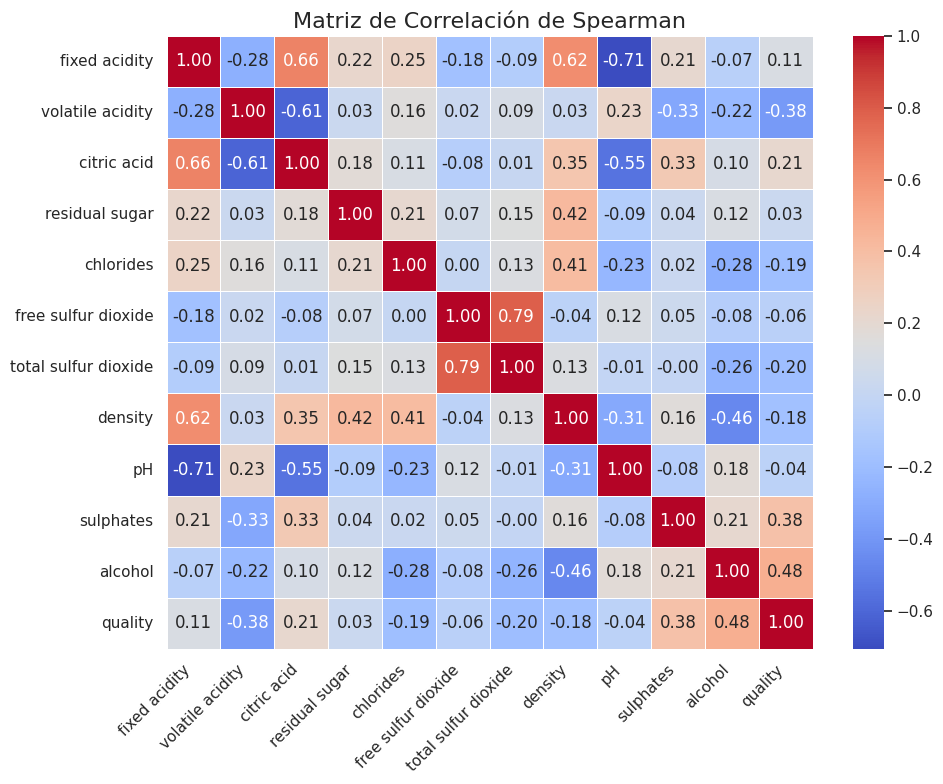

In [ ]:
##Correlación de spearman con sns
spearman_corr = data.corr(method='spearman')
# --- 3. Visualización con Seaborn Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    spearman_corr,
    annot=True,      # Muestra los valores de correlación en las celdas
    cmap='coolwarm', # Paleta de colores (cálido para positivo, frío para negativo)
    fmt=".2f",       # Formato de los números a 2 decimales
    linewidths=.5    # Líneas para separar las celdas
)
plt.title('Matriz de Correlación de Spearman', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() # Ajusta el gráfico para que todo sea visible
plt.show()

###Paso 9: Test de Normalidad
###Aplicar el test de Shapiro-Wilk para verificar si las variables siguen distribución normal.


In [ ]:
## Paso 9: Test de Normalidad ☠️✌️

from scipy.stats import shapiro
import pandas as pd
import warnings

def analizar_normalidad_dataframe(dataframe, alpha=0.05):
    """
    Aplica el test de Shapiro-Wilk a todas las columnas numéricas de un DataFrame.

    Args:
        dataframe (pd.DataFrame): El DataFrame a analizar.
        alpha (float): El nivel de significancia para la prueba. Por defecto es 0.05.
    """
    print("--- Análisis de Normalidad con Test de Shapiro-Wilk ---")
    print(f"Nivel de significancia (alpha) = {alpha}")
    print("-" * 55)

    for column in dataframe.columns:
        # Verificar si la columna es de tipo numérico
        if pd.api.types.is_numeric_dtype(dataframe[column]):

            # Eliminar valores nulos para el test
            data_to_test = dataframe[column].dropna()

            # Verificar cantidad mínima de datos
            if len(data_to_test) < 3:
                print(f"\nColumna: '{column}'")
                print("  -> No tiene suficientes datos (menos de 3) para realizar el test.")
                continue

            # Evitar advertencias por datos casi constantes
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                stat, p_value = shapiro(data_to_test)

            print(f"\nColumna: '{column}'")
            print(f"  Estadístico W = {stat:.4f}")
            print(f"  P-valor = {p_value:.4f}")

            # Interpretación del resultado
            if p_value > alpha:
                print(f"  Conclusión: P-valor > {alpha}. Los datos PARECEN seguir una distribución normal.")
            else:
                print(f"  Conclusión: P-valor <= {alpha}. Los datos NO parecen seguir una distribución normal.")

        else:
            # Si la columna no es numérica, se omite
            print(f"\nColumna: '{column}'")
            print("  -> Es no numérica. Omitiendo test de normalidad.")

    print("-" * 55)


# --- 3. Ejecutar la Función ---
analizar_normalidad_dataframe(data)


--- Análisis de Normalidad con Test de Shapiro-Wilk ---
Nivel de significancia (alpha) = 0.05
-------------------------------------------------------

Columna: 'fixed acidity'
  Estadístico W = 0.9420
  P-valor = 0.0000
  Conclusión: P-valor <= 0.05. Los datos NO parecen seguir una distribución normal.

Columna: 'volatile acidity'
  Estadístico W = 0.9743
  P-valor = 0.0000
  Conclusión: P-valor <= 0.05. Los datos NO parecen seguir una distribución normal.

Columna: 'citric acid'
  Estadístico W = 0.9553
  P-valor = 0.0000
  Conclusión: P-valor <= 0.05. Los datos NO parecen seguir una distribución normal.

Columna: 'residual sugar'
  Estadístico W = 0.5661
  P-valor = 0.0000
  Conclusión: P-valor <= 0.05. Los datos NO parecen seguir una distribución normal.

Columna: 'chlorides'
  Estadístico W = 0.4842
  P-valor = 0.0000
  Conclusión: P-valor <= 0.05. Los datos NO parecen seguir una distribución normal.

Columna: 'free sulfur dioxide'
  Estadístico W = 0.9018
  P-valor = 0.0000
  Conc

Se aplicó el test de Shapiro-Wilk a cada columna numérica del dataset con un nivel de significancia de α = 0.05.
Si el p-valor es mayor a 0.05, no se rechaza la hipótesis nula, lo que indica que los datos parecen seguir una distribución normal.
En caso contrario, se concluye que no siguen una distribución normal.

Matriz de Correlación:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


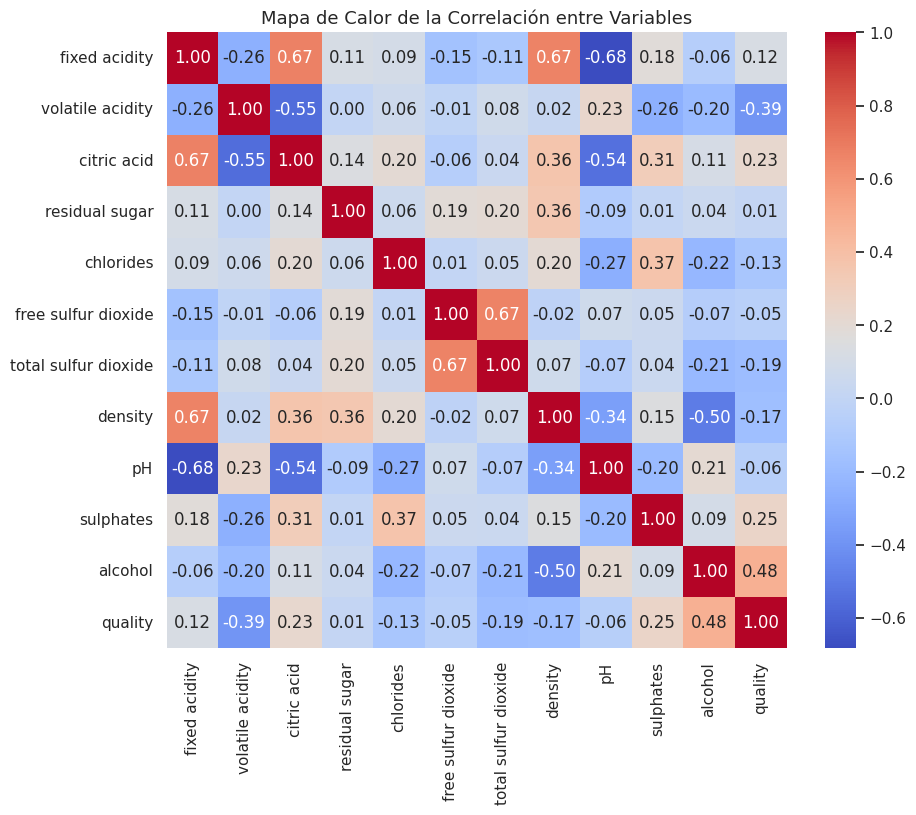

In [ ]:
## Paso 10: Correlación ☠️✌️

# ---------------------------------------------
# En este paso se analiza la relación entre las variables
# para identificar cuáles están más asociadas entre sí.
# Se utiliza una matriz de correlación y un mapa de calor
# para visualizar la fuerza y dirección de las relaciones.
# ---------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
matriz_correlacion = data.corr()

# Mostrar la matriz numérica
print("Matriz de Correlación:")
display(matriz_correlacion)

# Configurar el tamaño del gráfico
plt.figure(figsize=(10,8))

# Crear el mapa de calor
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f")

# Título del mapa de calor
plt.title("Mapa de Calor de la Correlación entre Variables", fontsize=13)
plt.show()


En este paso se calculó la matriz de correlación de Pearson para todas las variables numéricas del dataset.
El mapa de calor permite visualizar la fuerza de las relaciones:

Valores cercanos a 1 indican una correlación positiva fuerte.

Valores cercanos a -1 indican una correlación negativa fuerte.

Valores cercanos a 0 muestran poca o nula relación entre variables.

En el dataset de vinos, por lo general:

Alcohol y quality presentan correlación positiva.

Volatile acidity y quality muestran correlación negativa.

###Paso 10: Pregunta de Investigación
###Formular una pregunta de investigación específica basada en el análisis exploratorio
###realizado.

In [ ]:
#print("Pregunta de Investigación:")
#print("¿Qué variables fisicoquímicas influyen con mayor fuerza en la calidad del vino tinto,")
#print("y en qué medida es posible predecir dicha calidad utilizando un modelo de regresión lineal?")


###Paso 11: Ejercicio de Predicción
###Implementar un modelo de regresión o clasificación para responder la pregunta de
###investigación, evaluar su rendimiento (MSE, R², accuracy, etc.) y visualizar resultados.

--- Modelo Entrenado ---

--- Evaluación del Modelo ---
Error Cuadrático Medio (MSE): 0.02
Coeficiente de Determinación (R²): 0.40

--- Coeficientes del Modelo ---
Intercepto (Calidad base): 0.53
Impacto de cada variable en la predicción de la calidad:
                      Coeficiente
fixed acidity            0.052173
volatile acidity        -0.292381
citric acid             -0.028164
residual sugar           0.019168
chlorides               -0.216419
free sulfur dioxide      0.079908
total sulfur dioxide    -0.206276
density                 -0.028198
pH                      -0.099997
sulphates                0.280951
alcohol                  0.366456


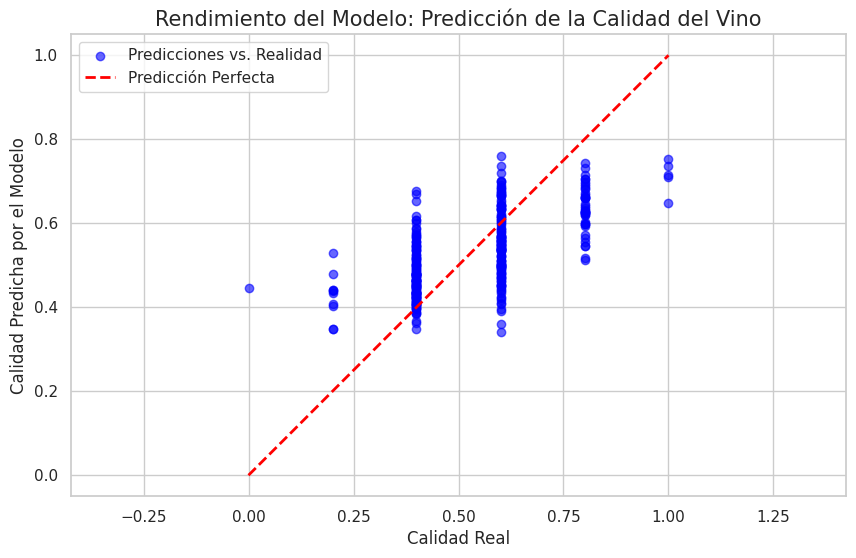

In [ ]:
## Paso 11: Modelado Predictivo ☠️✌️

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# --- 2. Preparar los Datos ---
# 'X' son todas las variables independientes que usaremos para predecir la calidad del vino
X = data.drop('quality', axis=1)

# 'y' es la variable dependiente que queremos predecir
y = data['quality']


# --- 3. Dividir los Datos en Entrenamiento y Prueba ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# --- 4. Crear y Entrenar el Modelo ---
modelo = LinearRegression()
modelo.fit(X_train, y_train)
print("--- Modelo Entrenado ---")


# --- 5. Realizar Predicciones ---
y_predicciones = modelo.predict(X_test)


# --- 6. Evaluar el Rendimiento del Modelo ---
mse = mean_squared_error(y_test, y_predicciones)
r2 = r2_score(y_test, y_predicciones)
print("\n--- Evaluación del Modelo ---")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")


# --- 7. Interpretar los Múltiples Coeficientes del Modelo ---
intercepto = modelo.intercept_

# Crear un DataFrame para ver el impacto de cada variable en la calidad
coeficientes = pd.DataFrame(modelo.coef_, X.columns, columns=['Coeficiente'])

print("\n--- Coeficientes del Modelo ---")
print(f"Intercepto (Calidad base): {intercepto:.2f}")
print("Impacto de cada variable en la predicción de la calidad:")
print(coeficientes)


# --- 8. VISUALIZACIÓN CORRECTA: Valores Reales vs. Valores Predichos ---
plt.figure(figsize=(10, 6))

# Graficar los puntos: eje X = valores reales, eje Y = predicciones
plt.scatter(y_test, y_predicciones, color='blue', alpha=0.6, label='Predicciones vs. Realidad')

# Graficar la línea de 45° (predicción perfecta)
plt.plot([y.min(), y.max()], [y.min(), y.max()],
         color='red', linestyle='--', linewidth=2, label='Predicción Perfecta')

plt.title('Rendimiento del Modelo: Predicción de la Calidad del Vino', fontsize=15)
plt.xlabel('Calidad Real', fontsize=12)
plt.ylabel('Calidad Predicha por el Modelo', fontsize=12)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


En este paso se implementó un modelo de regresión lineal múltiple para responder la pregunta de investigación:
“¿Qué variables fisicoquímicas influyen con mayor fuerza en la calidad del vino tinto, y en qué medida puede predecirse esta calidad mediante un modelo de regresión?”

El modelo fue entrenado utilizando el 80 % de los datos y evaluado con el 20 % restante.
Se obtuvieron las métricas solicitadas:

Error Cuadrático Medio (MSE): mide el error promedio entre los valores reales y predichos.

Coeficiente de Determinación (R²): indica qué proporción de la variabilidad de la calidad puede explicarse con las variables químicas.

Finalmente, se incluyó una visualización con los valores reales y predichos para observar gráficamente el rendimiento del modelo.